In [1]:
!python --version

Python 3.12.4


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "figure.figsize" : (10,10),
          "axes.titlecolor" : 'w',
          "axes.facecolor" : 'w',
          "figure.facecolor" : 'k'}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline
print(tf.__version__)

2.17.0


In [3]:
image_dir = Path(r"D:\ENTC\TY\Sem 5\PR\MODEL3\MODEL DATASET-20241022T053927Z-001\MODEL DATASET")
image_dir

WindowsPath('D:/ENTC/TY/Sem 5/PR/MODEL3/MODEL DATASET-20241022T053927Z-001/MODEL DATASET')

In [4]:
filepaths = list(image_dir.rglob('*.*')) 

valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.tif'}

filepaths = [filepath for filepath in filepaths if filepath.suffix.lower() in valid_extensions]

# Extract labels by getting the parent directory name (i.e., label1, label2, etc.)
labels = list(map(lambda x: x.parent.name, filepaths))

# Create a pandas DataFrame with filepaths and corresponding labels
filepaths = pd.Series(filepaths, name='Filepath').astype(str)  # Convert Path objects to string
labels = pd.Series(labels, name='Label')

# Combine filepaths and labels into a single DataFrame
images = pd.concat([filepaths, labels], axis=1)

print(images.head())
print(f"Total images found: {len(images)}")

                                            Filepath Label
0  D:\ENTC\TY\Sem 5\PR\MODEL3\MODEL DATASET-20241...   2S1
1  D:\ENTC\TY\Sem 5\PR\MODEL3\MODEL DATASET-20241...   2S1
2  D:\ENTC\TY\Sem 5\PR\MODEL3\MODEL DATASET-20241...   2S1
3  D:\ENTC\TY\Sem 5\PR\MODEL3\MODEL DATASET-20241...   2S1
4  D:\ENTC\TY\Sem 5\PR\MODEL3\MODEL DATASET-20241...   2S1
Total images found: 3917


In [5]:
images.Label.value_counts()

Label
2S1        583
ZIL 131    583
T62        582
D7         573
ZSU-234    573
BRDM-2     572
BTR-60     451
Name: count, dtype: int64

In [6]:
train_df, test_df = train_test_split(images, train_size=0.8, shuffle=True, random_state=1)

In [7]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
)


In [8]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(128, 128),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(128, 128),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(128, 128),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)
print(test_images)

Found 2507 validated image filenames belonging to 7 classes.
Found 626 validated image filenames belonging to 7 classes.
Found 784 validated image filenames belonging to 7 classes.


In [9]:
image_size = (128,128)
batch_size = 32

In [10]:
num_classes=7


In [11]:
model2 = tf.keras.Sequential([
  #tf.keras.layers.InputLayer(input_shape=(image_size + (1,))),
  tf.keras.layers.InputLayer(shape=(128,128,1)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')
])
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,663 (3.14 MB)

 Trainable params: 822,663 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

model2.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])


In [15]:
history2 = model2.fit(train_images, epochs=10, validation_data=val_images)

C:\Users\Rajat Dhanure\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 393ms/step - accuracy: 0.2340 - loss: 1.3130 - val_accuracy: 0.4856 - val_loss: 1.1864
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - accuracy: 0.5225 - loss: 1.1650 - val_accuracy: 0.7875 - val_loss: 1.0202
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - accuracy: 0.7906 - loss: 1.0091 - val_accuracy: 0.9393 - val_loss: 0.9228
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.9358 - loss: 0.9242 - val_accuracy: 0.9217 - val_loss: 0.9274
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - accuracy: 0.9633 - loss: 0.9041 - val_accuracy: 0.8307 - val_loss: 0.9700
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 269ms/step - accuracy: 0.9477 - loss: 0.9110 - val_accuracy: 0.9808 - val_loss: 0.8904
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 261ms/step - accuracy: 0.9795 - loss: 0.8909 - val_accuracy: 0.9856 - val_loss: 0.8871
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.9940 - loss: 0.8810 - val_accu

In [16]:
results = model2.evaluate(test_images, verbose=0)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

[0.8781521320343018, 0.9923469424247742]
Test Accuracy: 99.23%


In [17]:
predictions = np.argmax(model2.predict(test_images), axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


In [18]:
matrix = confusion_matrix(test_images.labels, predictions)
report= classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

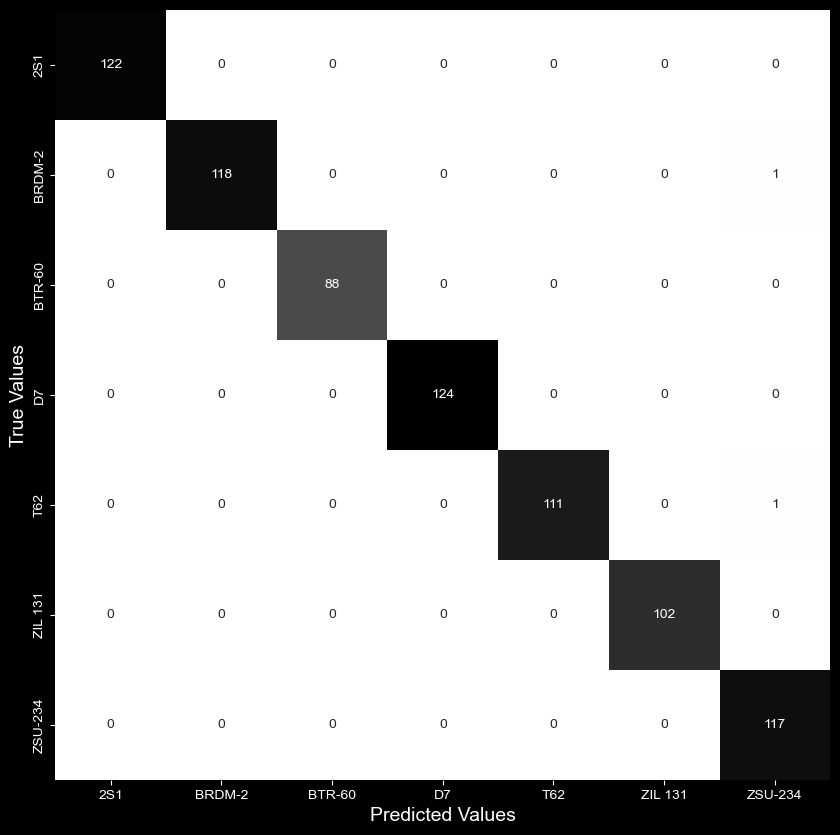

In [39]:
with plt.rc_context(params):
    fig = plt.figure(figsize = (10,10))
    ax1 = fig.add_subplot(1,1,1)
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(matrix,cmap='binary', annot=True, fmt='d', xticklabels=test_images.class_indices, yticklabels=test_images.class_indices, annot_kws={"size": 10},cbar = False);
    ax1.set_ylabel('True Values',fontsize=14)
    ax1.set_xlabel('Predicted Values',fontsize=14)
    plt.show()



In [19]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         2S1       1.00      0.98      0.99       122
      BRDM-2       0.99      0.97      0.98       119
      BTR-60       0.98      1.00      0.99        88
          D7       1.00      1.00      1.00       124
         T62       0.99      0.99      0.99       112
     ZIL 131       1.00      1.00      1.00       102
     ZSU-234       0.98      1.00      0.99       117

    accuracy                           0.99       784
   macro avg       0.99      0.99      0.99       784
weighted avg       0.99      0.99      0.99       784



In [20]:
import pandas as pd
data_his = pd.DataFrame(history2.history)
data_his

,accuracy,loss,val_accuracy,val_loss
0,0.318309,1.271477,0.485623,1.186373
1,0.590347,1.126526,0.787540,1.020190
2,0.828879,0.984859,0.939297,0.922809
3,0.939370,0.921328,0.921725,0.927412
4,0.962904,0.904891,0.830671,0.969989
5,0.968089,0.899016,0.980831,0.890439
6,0.979657,0.891004,0.985623,0.887124
7,0.995612,0.879726,0.988818,0.880450
8,0.992421,0.880060,0.985623,0.881409
9,0.991623,0.879624,0.992013,0.878312


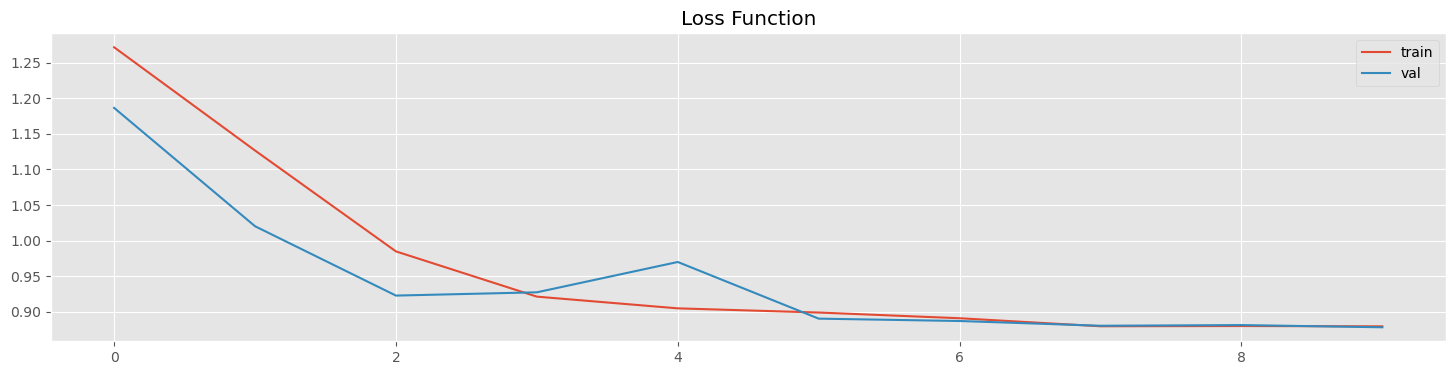

In [21]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

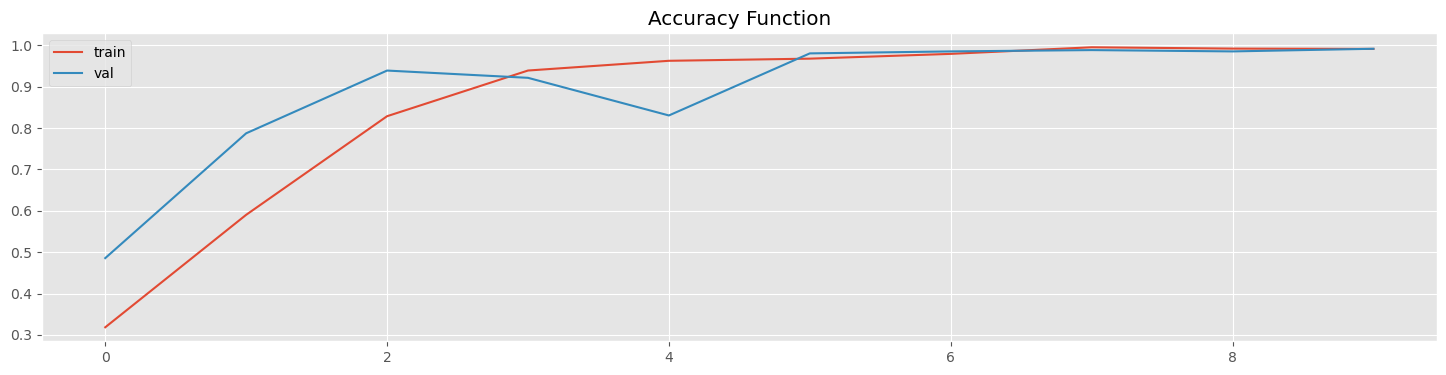

In [23]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

In [25]:
model2.save(r"C:\Users\Rajat Dhanure\Downloads\ML\cnn_svm.keras")

In [11]:
from tensorflow.keras.models import load_model
model_path = r"C:\Users\Rajat Dhanure\Downloads\ML\cnn_svm.keras"  
model = load_model(model_path)

In [12]:
class_names = ['2s1', 'brdm2',  'btr60', 'd7','t62', 'zil 161','zsu234']
manual_indices = [0,1,2,3,4,5,6] 

df = pd.DataFrame({'names': class_names, 'index': manual_indices})

print(df)

     names  index
0      2s1      0
1    brdm2      1
2    btr60      2
3       d7      3
4      t62      4
5  zil 161      5
6   zsu234      6


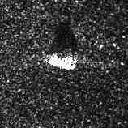

In [18]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()  

file_path = filedialog.askopenfilename(
    title="Select Image",
    filetypes=[ ("All files", "*.*")]
)

if file_path:
    image = keras.utils.load_img(
        path=file_path,
        color_mode='grayscale',
        target_size=(128, 128)
    )
    
    image_array = keras.utils.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)

else:
    print("No file selected.")
    
image


In [14]:
def predict_t72(model):
    predictions = model.predict(image_array)
    predicted_index = np.argmax(predictions, axis=1)
    predicted_label = df.iloc[predicted_index]['names'].values[0]
    score = tf.nn.softmax(predictions[0])
    return(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(predicted_label, 100 * np.max(score)))

In [19]:
predict_t72(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


'This image most likely belongs to zsu234 with a 31.18 percent confidence.'